# Microéconomie 5
## TD1 : Répartition optimale des ressources

### Exercice 1 : Préférences Cobb-Douglas

Les dotations de l'économie sont $\omega_1 = 40$ et $\omega_2 = 30$. Les agents ont les préférences

\begin{aligned}
    U^A(x^A) &= (x_1^A)^\frac{1}{4} (x_2^A)^\frac{3}{4} \\
    U^B(x^B) &= x_1^B \, x_2^B.
\end{aligned}


Le code suivant commence par définir ces données du problème.

In [1]:
ω1 <- 40                                     # dotation totale en bien 1
ω2 <- 30                                     # dotation totale en bien 2
UA <- function(x1, x2) x1^(1/4) * x2^(3/4)   # fonction d'utilité de A
UB <- function(x1, x2) x1 * x2               # fonction d'utilité de B
x1 <- seq(0, ω1, length=1000)                # série de valeurs de x1 pour tracer les courbes

#### Question 1.
Rappelons la définition : les préférences de $A$ sont convexes si pour tout panier $x^A$, l'ensemble des paniers préférés ou équivalents à $x^A$ est convexe.

En pratique, on vérifie que les courbes d'indifférence de $A$ sont convexes. La courbe d'indifférence de $A$ à utilité fixée $U_0$ a pour équation
\begin{equation}
    U^A(x^A) = U_0
    \iff
    x_2^A = \frac{ (U_0)^\frac{4}{3} }{ (x_1^A)^\frac{1}{3} }.
\end{equation}
Cette expression définit bien des courbes d'indifférence convexes.

De façon similaire pour $B$, 
\begin{equation}
    U^B(x^B) = U_0
    \iff
    x_2^B = \frac{U_0}{x_1^B}
\end{equation}
qui définit aussi des courbes d'indifférence convexes.


#### Question 2.
Représentons les courbes d'indifférence des deux agents dans la boîte d'Edgeworth.


Le code suivant commence par définir deux fonctions `indiffA` et `indiffB` qui prennent en argument un niveau d'utilité `U` et qui renvoient les points de la courbe d'indifférence correspondant à ce niveau d'utilité. On trace ensuite les courbes d'indifférence pour des niveaux d'utilité bien choisis : celles de $A$ en bleu et celles de $B$ en orange.

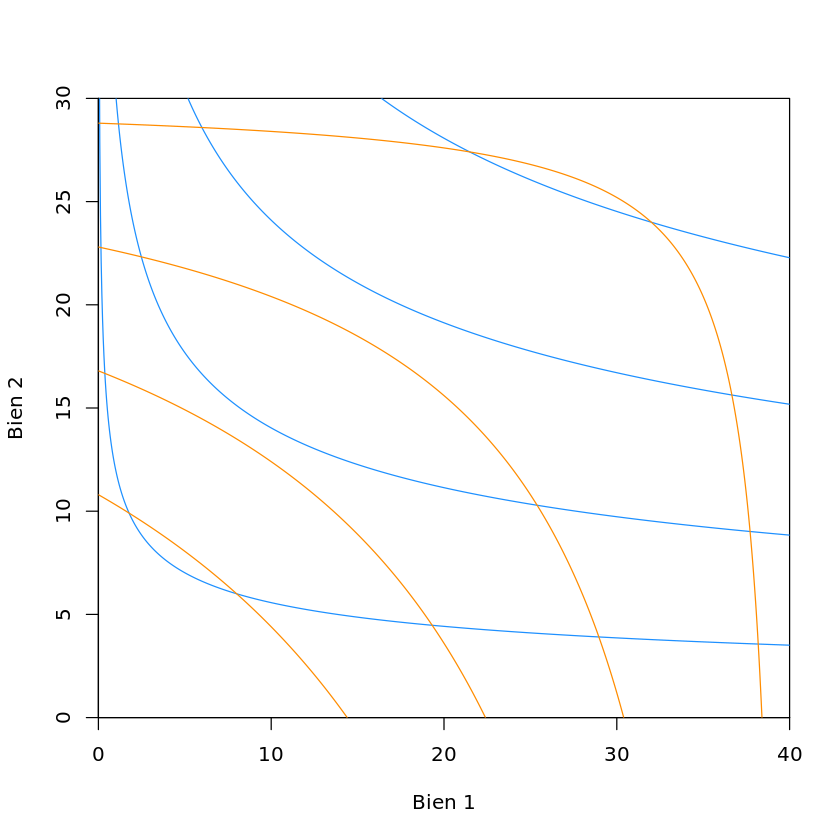

In [2]:
indiffA <- function(U) U^(4/3) / x1^(1/3)
indiffB <- function(U) U/x1

niveauxA <- seq(UA(ω1/5, ω2/5), UA(4*ω1/5, 4*ω2/5), len = 4)
niveauxB <- seq(UB(ω1/5, ω2/5), UB(4*ω1/5, 4*ω2/5), len = 4)

plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", xlab = "Bien 1", ylab = "Bien 2", xaxs = "i", yaxs = "i")
for (U in niveauxA) lines(x1, indiffA(U), col = "dodgerblue", ylim = c(0, ω2))            # CI de A
for (U in niveauxB) lines(x1, rev(ω2 - indiffB(U)), col = "darkorange", ylim = c(0, ω2))  # CI de B

#### Question 3.

L'agent $B$ est indifférent entre les paniers $(1, 1)$ et $(2, \frac{1}{2})$, puisque

\begin{equation}
    U^B(1, 1) = 1 = 2 \, \frac{1}{2} = U^B(2, \tfrac{1}{2}).
\end{equation}

Au contraire, l'agent $A$ préfère le panier $(1, 1)$ au panier $(2, \frac{1}{2})$ :

\begin{equation}
    U^A(1, 1) = 1 > 2^{-\frac{1}{2}} = 2^\frac{1}{4} (\tfrac{1}{2})^\frac{3}{4} = U^B(2, \tfrac{1}{2}).
\end{equation}

Les agents $A$ et $B$ n'ont donc pas les mêmes préférences.

#### Question 4.
On cherche la courbe des optima de Pareto : pour cela, il faut par exemple résoudre le programme

\begin{equation}
    \max_{x^A, x^B} \; U^A(x^A) \qquad
        \text{s.c.} \; \begin{cases}
        U^B(x^B) \geq \underline U^B \\
        x_1^A + x_1^B \leq \omega_1 \\
        x_2^A + x_2^B \leq \omega_2 \\
        x_i^k \geq 0 \; (\forall i \in \{1, 2\}, k \in \{A, B\}).
        \end{cases}
\end{equation}

Ignorons _a priori_ les contraintes de positivité des allocations. Le lagrangien associé à ce problème est alors

\begin{equation}
    \mathcal L (x^A, x^B, \lambda, \mu_1, \mu_2)
    = (x_1^A)^\frac{1}{4} (x_2^A)^\frac{3}{4} + \lambda (x_1^B \, x_2^B - \underline U^B) + \mu_1 (\omega_1 - x_1^A - x_1^B) + \mu_2 (\omega_2 - x_2^A - x_2^B).
\end{equation}

On en déduit les conditions du premier ordre par rapport aux sept variables $x_1^A$, $x_2^A$, $x_1^B$, $x_2^B$, $\lambda$, $\mu_1$, et $\mu_2$,

\begin{aligned}
    &\tfrac{1}{4} (x_1^A)^{-\frac{3}{4}} (x_2^A)^\frac{3}{4} - \mu_1 = 0 \\
    &\tfrac{3}{4} (x_1^A)^\frac{1}{4} (x_2^A)^{-\frac{1}{4}} - \mu_2 = 0 \\
    &\lambda x_2^B - \mu_1 = 0 \\
    &\lambda x_1^B - \mu_2 = 0 \\
    &x_1^B \, x_2^B = \underline U^B \\
    &x_1^A + x_1^B = \omega_1 \\
    &x_2^A + x_2^B = \omega_2.
\end{aligned}

Une combinaison adéquate de ces équations fournit

\begin{equation}
    \underbrace{\frac{1}{3} \frac{x_2^A}{x_1^A}}_{= \mathsf{TMS}^A} = \frac{\mu_1}{\mu_2} = \underbrace{\frac{x_2^B}{x_1^B}}_{= \mathsf{TMS}^B} = \frac{\omega_2 - x_2^A}{\omega_1 - x_1^A}
\end{equation}

que l'on résout pour finalement obtenir les $x_2^A$ optimaux en fonction de $x_1^A$ :

\begin{equation}
    \boxed{ x_2^A = \frac{3 \omega_2 x_1^A}{\omega_1 + 2 x_1^A} }
    \overset{\text{A.N.}}{=} \frac{45 x_1^A}{20 + x_1^A}.
\end{equation}

Alternativement, pour trouver les optima de Pareto on peut aussi résoudre le programme suivant pour toutes valeurs de $a \geq 0$ et $b \geq 0$ :

\begin{equation}
    \max_{x^A, x^B} \; a \, U^A(x^A) + b \, U^B(x^B) \qquad
        \text{s.c.} \; \begin{cases}
        x_1^A + x_1^B \leq \omega_1 \\
        x_2^A + x_2^B \leq \omega_2 \\
        x_i^k \geq 0 \; (\forall i \in \{1, 2\}, k \in \{A, B\}).
        \end{cases}
\end{equation}

#### Question 5.
Représentons la courbe des optima.


Le code suivant définit une fonction `optima` qui prend en argument une allocation en bien 1 `x` et renvoie l'allocation optimale en bien 2 correspondante, selon la formule trouvée ci-dessus. On trace la courbe des optima (en violet), ainsi que quelques courbes d'indifférence : on remarque que les optima de Pareto sont bien les points de tangence entre les courbes d'indifférence de $A$ et de $B$.

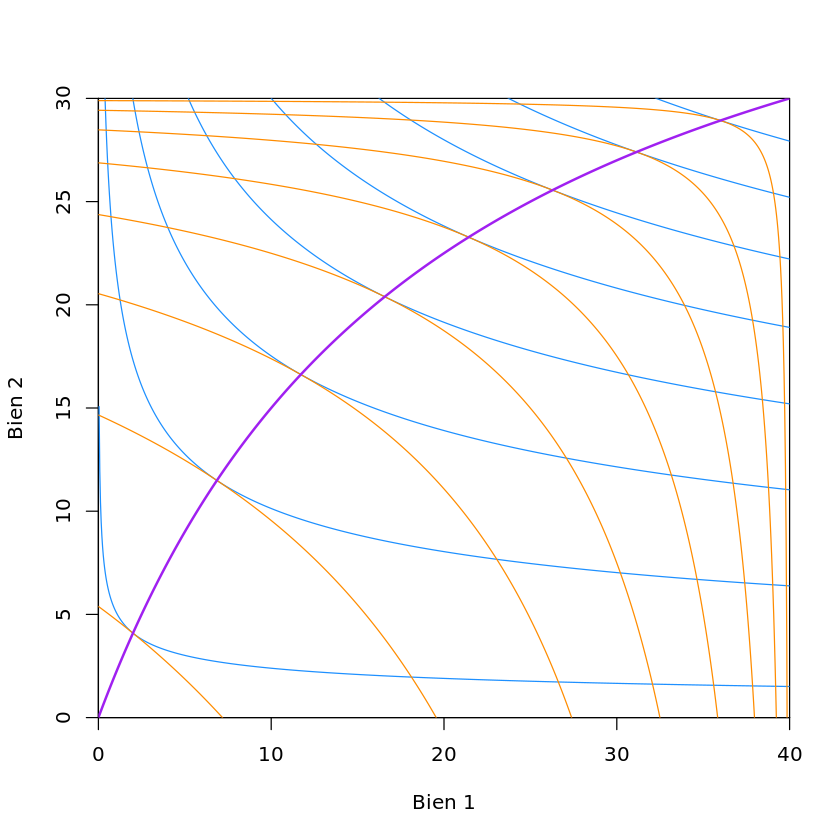

In [3]:
optima <- function(x) 3*ω2*x  / (ω1 + 2*x)

allocA1 <- seq(.05*ω1, .9*ω1, len=8)     # allocations de A en bien 1 pour les courbes d'indifférence

plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
for (i in 1:length(allocA1)) {                   # courbes d'indifférence tangentes
    xA1 <- allocA1[i]
    xA2 <- optima(allocA1[i])
    lines(x1, indiffA(UA(xA1, xA2)), col = "dodgerblue", ylim = c(0, ω2))
    lines(x1, rev(ω2 - indiffB(UB(ω1 - xA1, ω2 - xA2))), col = "darkorange", ylim = c(0, ω2))
}
lines(x1, optima(x1), col = "purple", lwd = 2)   # courbe des optima

#### Question 6. 
On s'intéresse aux allocations acceptées dans la négociation. À partir d'une allocation initiale $I$, un agent _refuse_ une proposition d'allocation dans deux cas :

1. Si l'allocation proposée lui fournit moins d'utilité qu'il n'en a actuellement à $I$ (c'est-à-dire si elle se situe sous sa courbe d'indifférence passant par $I$) ;

2. Si il existe une autre allocation, différente de celle proposée, qui serait meilleure pour lui sans nuire à l'agent qui fait la proposition (c'est-à-dire si la proposition n'est pas une allocation optimale).

À partir de l'allocation initiale $I$, une allocation est donc acceptée par $A$ si et seulement si elle est optimale **et** se situe au-dessus de sa courbe d'indifférence passant par $I$.


Prenons par exemple $I$ telle que $x_1^A = 20$ et $x_2^A = 15$, et représentons dans un premier temps l'ensemble des allocations acceptées par $A$ (en pointillés bleus).

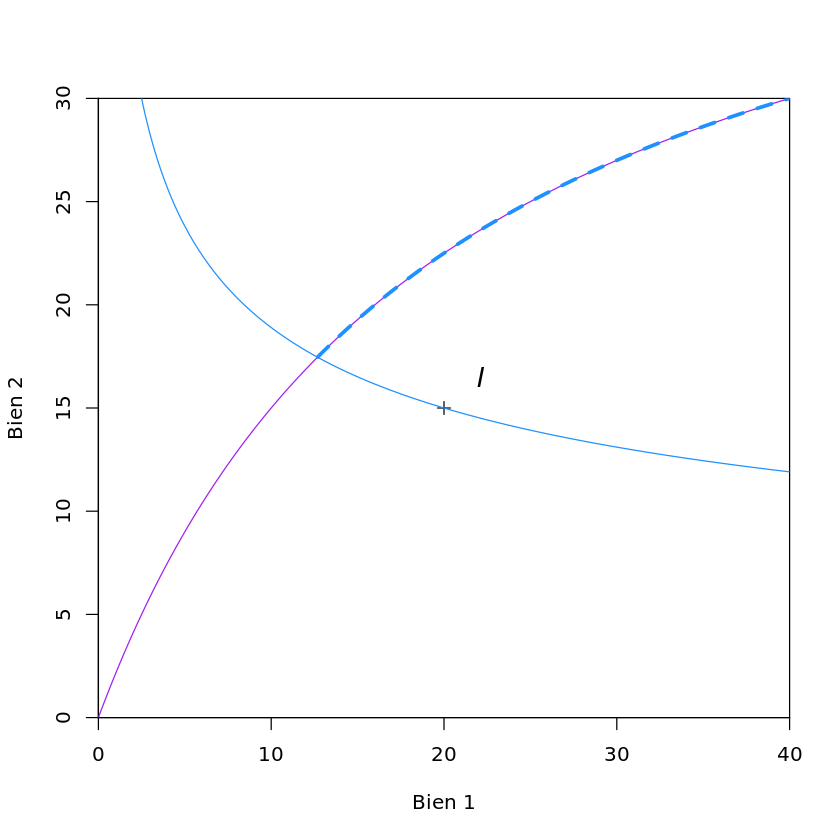

In [4]:
I <- c(20, 15)
XA <- x1[ UA(x1, optima(x1)) > UA(I[1], I[2]) ]                              # allocations acceptées par A

# Allocations acceptées par A

plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                  # point I
    text(I[1]+.05*ω1, I[2]+.05*ω2, labels = "I", cex = 1.3, font = 3)
lines(x1, optima(x1), col = "purple", lwd = 1)                               # courbe des optima
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, ω2))      # courbe d'indifférence de A passant par I
lines(XA, optima(XA), col = "dodgerblue", lwd = 3, lty = 2)                  # allocations acceptées par A

De manière similaire, les allocations acceptées par $B$ doivent être à la fois optimales **et** en dessous de la courbe d'indifférence de $B$ passant par $I$.

Représentons maintenant l'ensemble des allocations acceptées par $B$ (en pointillés oranges).

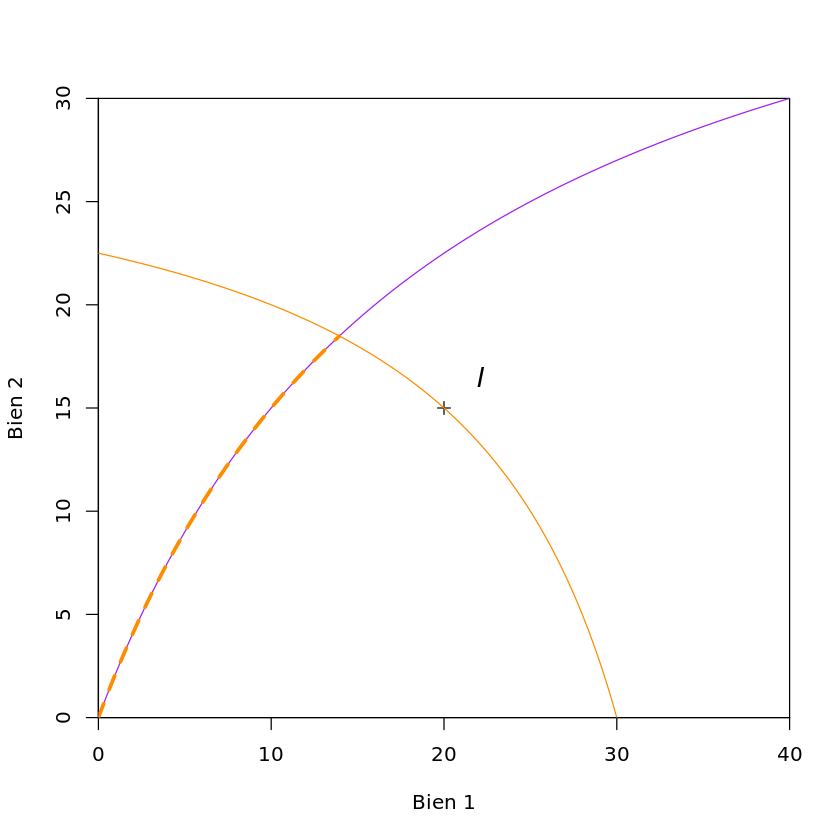

In [5]:
XB <- x1[ UB(ω1 - x1, ω2 - optima(x1)) > UB(ω1 - I[1], ω2 - I[2]) ]

# Allocations acceptées par B

plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                  # point I
    text(I[1]+.05*ω1, I[2]+.05*ω2, labels = "I", cex = 1.3, font = 3)
lines(x1, optima(x1), col = "purple", lwd = 1)                               # courbe des optima
lines(x1, rev(ω2 - indiffB(UB(ω1 - I[1], ω2 - I[2]))), col = "darkorange", ylim = c(0, ω2)) # courbe d'indifférence de B passant par I
lines(XB, optima(XB), col = "darkorange", lwd = 3, lty = 2)                  # allocations acceptées par B

Les allocations qui sont acceptées par **les deux** agents sont dont les allocations optimales se situant **entre** leurs deux courbes d'indifférence passant par $I$ : c'est le _coeur de l'économie_.

Représentons ici le coeur de l'économie en trait noir.

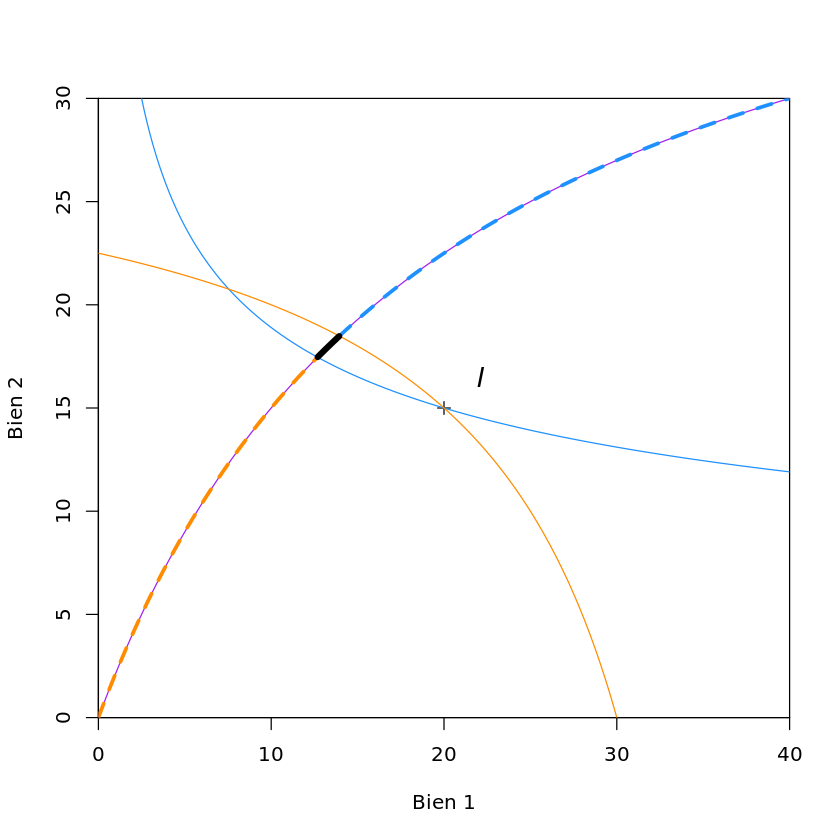

In [6]:
# Allocations acceptées par A

plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                  # point I
    text(I[1]+.05*ω1, I[2]+.05*ω2, labels = "I", cex = 1.3, font = 3)
lines(x1, optima(x1), col = "purple", lwd = 1)                               # courbe des optima
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, ω2))      # courbe d'indifférence de A
lines(XA, optima(XA), col = "dodgerblue", lwd = 3, lty = 2)                  # allocations acceptées par A

# Allocations acceptées par B

lines(x1, rev(ω2 - indiffB(UB(ω1 - I[1], ω2 - I[2]))), col = "darkorange", ylim = c(0, ω2)) # CI B
lines(XB, optima(XB), col = "darkorange", lwd = 3, lty = 2)                  # allocations acceptées par B

# Allocations acceptées par A et B
XAB <- intersect(XA, XB)
lines(XAB, optima(XAB), col = "black", lwd = 5)


#### Question 7.

Toute les allocations du coeur de l'économie sont Pareto optimales, on ne peut donc pas utiliser le critère de Pareto pour en sélectionner une en particulier.